#alphabet training 

In [2]:
%matplotlib inline
import tensorflow as tf
import keras
import collections
from keras import layers
from keras.layers import Input,Dense,Activation,ZeroPadding2D,BatchNormalization,Flatten,Conv2D
from keras.layers import AveragePooling2D,MaxPooling2D,Dropout,GlobalMaxPool2D,GlobalAveragePooling2D
from keras.models import Model
from keras import backend as K
from keras.models import load_model
from keras.preprocessing import image
import pydot
import random
import keras.backend as K
K.set_image_data_format('channels_last')

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

import h5py
import os
from PIL import Image
import PIL.ImageOps
from IPython.display import SVG
import scipy
import numpy as np

In [3]:
train_dataset = h5py.File("english_dataset_20200725-1.h5",'r')
X_train = np.array(train_dataset['x_train'][:])
Y_train = np.array(train_dataset['y_train'][:])
X_test = np.array(train_dataset['x_test'][:])
Y_test = np.array(train_dataset['y_test'][:])
train_dataset.close()

In [4]:
#the class name sequence is right; show the datasets contain diffent characters
class_names=["B","A","C","D","E","F","G","H",]
print("train:"+str(len(X_train)),"test:"+str(len(Y_test)))

train:6400 test:1600


In [5]:
print("number of traning examples = "+str(X_train.shape[0]))
print("number of test examples = "+str(X_test.shape[0]))
print("X_train shape:" + str(X_train.shape))
print("Y_train shape:" + str(Y_train.shape))
print("X_test shape:" + str(X_test.shape))
print("Y_test shape:" + str(Y_test.shape))
train_data=(X_train,Y_train)
test_data=(X_test,Y_test)

number of traning examples = 6400
number of test examples = 1600
X_train shape:(6400, 10, 10, 1)
Y_train shape:(6400, 1)
X_test shape:(1600, 10, 10, 1)
Y_test shape:(1600, 1)


In [6]:
## Build A model

In [13]:
def Pimodel(input_shape):
    X_input = Input(shape=input_shape)
    X=ZeroPadding2D(padding=(1,1))(X_input)
    X=Conv2D(1,kernel_size=(3,6),strides=(3,6),use_bias=None)(X)
    X=Activation('relu')(X)
    X=Flatten()(X)
    Y=Activation('softmax')(X)
    model=Model(inputs=X_input,outputs=Y,name="JSmodel")
    return model

In [14]:
picmodel = Pimodel((10,10,1))

In [15]:
picmodel.compile(optimizer=keras.optimizers.Adam(lr=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-08,decay=0.0),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [16]:
picmodel.summary()

Model: "JSmodel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 10, 10, 1)]       0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 12, 12, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 4, 2, 1)           18        
_________________________________________________________________
activation_2 (Activation)    (None, 4, 2, 1)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8)                 0         
_________________________________________________________________
activation_3 (Activation)    (None, 8)                 0         
Total params: 18
Trainable params: 18
Non-trainable params: 0
_______________________________________________________________

In [17]:
history=picmodel.fit(x=X_train,y=Y_train,batch_size=150,epochs=1000,validation_data=(X_test,Y_test))

Epoch 1/1000
43/43 [==============================] - 0s 6ms/step - loss: 2.0417 - accuracy: 0.2425 - val_loss: 2.0268 - val_accuracy: 0.2981
Epoch 2/1000
43/43 [==============================] - 0s 3ms/step - loss: 1.9870 - accuracy: 0.3498 - val_loss: 1.9341 - val_accuracy: 0.4075
Epoch 3/1000
43/43 [==============================] - 0s 3ms/step - loss: 1.8526 - accuracy: 0.4381 - val_loss: 1.7754 - val_accuracy: 0.4450
Epoch 4/1000
43/43 [==============================] - 0s 4ms/step - loss: 1.7237 - accuracy: 0.4453 - val_loss: 1.6727 - val_accuracy: 0.4675
Epoch 5/1000
43/43 [==============================] - 0s 4ms/step - loss: 1.6382 - accuracy: 0.4700 - val_loss: 1.5986 - val_accuracy: 0.4938
Epoch 6/1000
43/43 [==============================] - 0s 4ms/step - loss: 1.5717 - accuracy: 0.4978 - val_loss: 1.5367 - val_accuracy: 0.5356
Epoch 7/1000
43/43 [==============================] - 0s 4ms/step - loss: 1.5148 - accuracy: 0.5217 - val_loss: 1.4821 - val_accuracy: 0.5550
Epoch 

43/43 [==============================] - 0s 4ms/step - loss: 0.6270 - accuracy: 0.8344 - val_loss: 0.6152 - val_accuracy: 0.8481
Epoch 59/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.6205 - accuracy: 0.8372 - val_loss: 0.6087 - val_accuracy: 0.8512
Epoch 60/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.6140 - accuracy: 0.8384 - val_loss: 0.6023 - val_accuracy: 0.8512
Epoch 61/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.6077 - accuracy: 0.8394 - val_loss: 0.5961 - val_accuracy: 0.8531
Epoch 62/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.6015 - accuracy: 0.8413 - val_loss: 0.5899 - val_accuracy: 0.8550
Epoch 63/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.5955 - accuracy: 0.8427 - val_loss: 0.5840 - val_accuracy: 0.8569
Epoch 64/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.5895 - accuracy: 0.8461 - val_loss: 0.5781 - val_accuracy: 0.8581
Epoch 65/1000

43/43 [==============================] - 0s 3ms/step - loss: 0.3866 - accuracy: 0.9233 - val_loss: 0.3787 - val_accuracy: 0.9281
Epoch 116/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.3839 - accuracy: 0.9258 - val_loss: 0.3761 - val_accuracy: 0.9281
Epoch 117/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.3813 - accuracy: 0.9252 - val_loss: 0.3735 - val_accuracy: 0.9294
Epoch 118/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.3786 - accuracy: 0.9264 - val_loss: 0.3709 - val_accuracy: 0.9294
Epoch 119/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.3760 - accuracy: 0.9278 - val_loss: 0.3683 - val_accuracy: 0.9325
Epoch 120/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.3735 - accuracy: 0.9281 - val_loss: 0.3658 - val_accuracy: 0.9325
Epoch 121/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.3709 - accuracy: 0.9281 - val_loss: 0.3634 - val_accuracy: 0.9331
Epoch 1

Epoch 172/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.2731 - accuracy: 0.9514 - val_loss: 0.2688 - val_accuracy: 0.9538
Epoch 173/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.2716 - accuracy: 0.9514 - val_loss: 0.2673 - val_accuracy: 0.9538
Epoch 174/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.2702 - accuracy: 0.9516 - val_loss: 0.2660 - val_accuracy: 0.9538
Epoch 175/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.2688 - accuracy: 0.9544 - val_loss: 0.2646 - val_accuracy: 0.9550
Epoch 176/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.2674 - accuracy: 0.9533 - val_loss: 0.2633 - val_accuracy: 0.9544
Epoch 177/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.2660 - accuracy: 0.9536 - val_loss: 0.2619 - val_accuracy: 0.9544
Epoch 178/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.2647 - accuracy: 0.9547 - val_loss: 0.2606 - val_accuracy:

Epoch 229/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.2098 - accuracy: 0.9633 - val_loss: 0.2077 - val_accuracy: 0.9613
Epoch 230/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.2089 - accuracy: 0.9639 - val_loss: 0.2070 - val_accuracy: 0.9613
Epoch 231/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.2081 - accuracy: 0.9638 - val_loss: 0.2061 - val_accuracy: 0.9613
Epoch 232/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.2073 - accuracy: 0.9644 - val_loss: 0.2053 - val_accuracy: 0.9613
Epoch 233/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.2065 - accuracy: 0.9644 - val_loss: 0.2045 - val_accuracy: 0.9613
Epoch 234/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.2056 - accuracy: 0.9642 - val_loss: 0.2037 - val_accuracy: 0.9650
Epoch 235/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.2048 - accuracy: 0.9663 - val_loss: 0.2029 - val_accuracy:

Epoch 286/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.1712 - accuracy: 0.9725 - val_loss: 0.1706 - val_accuracy: 0.9688
Epoch 287/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.1707 - accuracy: 0.9705 - val_loss: 0.1700 - val_accuracy: 0.9681
Epoch 288/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.1702 - accuracy: 0.9719 - val_loss: 0.1696 - val_accuracy: 0.9688
Epoch 289/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.1697 - accuracy: 0.9727 - val_loss: 0.1691 - val_accuracy: 0.9688
Epoch 290/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.1691 - accuracy: 0.9723 - val_loss: 0.1686 - val_accuracy: 0.9688
Epoch 291/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.1686 - accuracy: 0.9728 - val_loss: 0.1681 - val_accuracy: 0.9688
Epoch 292/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.1681 - accuracy: 0.9728 - val_loss: 0.1676 - val_accuracy:

Epoch 343/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.1463 - accuracy: 0.9753 - val_loss: 0.1466 - val_accuracy: 0.9719
Epoch 344/1000
43/43 [==============================] - 0s 5ms/step - loss: 0.1460 - accuracy: 0.9755 - val_loss: 0.1462 - val_accuracy: 0.9719
Epoch 345/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.1456 - accuracy: 0.9755 - val_loss: 0.1459 - val_accuracy: 0.9706
Epoch 346/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.1453 - accuracy: 0.9753 - val_loss: 0.1455 - val_accuracy: 0.9719
Epoch 347/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.1449 - accuracy: 0.9755 - val_loss: 0.1452 - val_accuracy: 0.9719
Epoch 348/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.1446 - accuracy: 0.9753 - val_loss: 0.1449 - val_accuracy: 0.9719
Epoch 349/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.1442 - accuracy: 0.9755 - val_loss: 0.1446 - val_accuracy:

Epoch 400/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.1291 - accuracy: 0.9805 - val_loss: 0.1300 - val_accuracy: 0.9762
Epoch 401/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.1289 - accuracy: 0.9797 - val_loss: 0.1298 - val_accuracy: 0.9769
Epoch 402/1000
43/43 [==============================] - 0s 5ms/step - loss: 0.1286 - accuracy: 0.9808 - val_loss: 0.1295 - val_accuracy: 0.9769
Epoch 403/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.1284 - accuracy: 0.9808 - val_loss: 0.1293 - val_accuracy: 0.9762
Epoch 404/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.1281 - accuracy: 0.9805 - val_loss: 0.1290 - val_accuracy: 0.9762
Epoch 405/1000
43/43 [==============================] - 0s 5ms/step - loss: 0.1278 - accuracy: 0.9802 - val_loss: 0.1288 - val_accuracy: 0.9762
Epoch 406/1000
43/43 [==============================] - 0s 5ms/step - loss: 0.1276 - accuracy: 0.9806 - val_loss: 0.1285 - val_accuracy:

Epoch 457/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.1165 - accuracy: 0.9812 - val_loss: 0.1179 - val_accuracy: 0.9794
Epoch 458/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.1163 - accuracy: 0.9811 - val_loss: 0.1177 - val_accuracy: 0.9794
Epoch 459/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.1162 - accuracy: 0.9812 - val_loss: 0.1175 - val_accuracy: 0.9794
Epoch 460/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.1160 - accuracy: 0.9812 - val_loss: 0.1174 - val_accuracy: 0.9794
Epoch 461/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.1158 - accuracy: 0.9812 - val_loss: 0.1172 - val_accuracy: 0.9794
Epoch 462/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.1156 - accuracy: 0.9808 - val_loss: 0.1170 - val_accuracy: 0.9794
Epoch 463/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.1154 - accuracy: 0.9814 - val_loss: 0.1168 - val_accuracy:

Epoch 514/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.1070 - accuracy: 0.9817 - val_loss: 0.1088 - val_accuracy: 0.9794
Epoch 515/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.1068 - accuracy: 0.9814 - val_loss: 0.1086 - val_accuracy: 0.9794
Epoch 516/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.1067 - accuracy: 0.9816 - val_loss: 0.1085 - val_accuracy: 0.9794
Epoch 517/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.1065 - accuracy: 0.9817 - val_loss: 0.1083 - val_accuracy: 0.9800
Epoch 518/1000
43/43 [==============================] - 0s 5ms/step - loss: 0.1064 - accuracy: 0.9819 - val_loss: 0.1082 - val_accuracy: 0.9800
Epoch 519/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.1063 - accuracy: 0.9814 - val_loss: 0.1080 - val_accuracy: 0.9806
Epoch 520/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.1061 - accuracy: 0.9814 - val_loss: 0.1079 - val_accuracy:

Epoch 571/1000
43/43 [==============================] - 0s 5ms/step - loss: 0.0995 - accuracy: 0.9817 - val_loss: 0.1016 - val_accuracy: 0.9800
Epoch 572/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.0994 - accuracy: 0.9819 - val_loss: 0.1015 - val_accuracy: 0.9800
Epoch 573/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.0993 - accuracy: 0.9817 - val_loss: 0.1013 - val_accuracy: 0.9812
Epoch 574/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.0991 - accuracy: 0.9817 - val_loss: 0.1013 - val_accuracy: 0.9800
Epoch 575/1000
43/43 [==============================] - 0s 5ms/step - loss: 0.0990 - accuracy: 0.9817 - val_loss: 0.1011 - val_accuracy: 0.9800
Epoch 576/1000
43/43 [==============================] - 0s 5ms/step - loss: 0.0989 - accuracy: 0.9817 - val_loss: 0.1010 - val_accuracy: 0.9800
Epoch 577/1000
43/43 [==============================] - 0s 5ms/step - loss: 0.0988 - accuracy: 0.9817 - val_loss: 0.1009 - val_accuracy:

43/43 [==============================] - 0s 7ms/step - loss: 0.0934 - accuracy: 0.9817 - val_loss: 0.0958 - val_accuracy: 0.9800
Epoch 628/1000
43/43 [==============================] - 0s 7ms/step - loss: 0.0933 - accuracy: 0.9819 - val_loss: 0.0957 - val_accuracy: 0.9812
Epoch 629/1000
43/43 [==============================] - 0s 7ms/step - loss: 0.0932 - accuracy: 0.9817 - val_loss: 0.0956 - val_accuracy: 0.9800
Epoch 630/1000
43/43 [==============================] - 0s 7ms/step - loss: 0.0932 - accuracy: 0.9820 - val_loss: 0.0955 - val_accuracy: 0.9812
Epoch 631/1000
43/43 [==============================] - 0s 6ms/step - loss: 0.0930 - accuracy: 0.9819 - val_loss: 0.0954 - val_accuracy: 0.9812
Epoch 632/1000
43/43 [==============================] - 0s 6ms/step - loss: 0.0929 - accuracy: 0.9817 - val_loss: 0.0954 - val_accuracy: 0.9800
Epoch 633/1000
43/43 [==============================] - 0s 6ms/step - loss: 0.0929 - accuracy: 0.9817 - val_loss: 0.0953 - val_accuracy: 0.9800
Epoch 6

Epoch 684/1000
43/43 [==============================] - 0s 6ms/step - loss: 0.0884 - accuracy: 0.9820 - val_loss: 0.0910 - val_accuracy: 0.9812
Epoch 685/1000
43/43 [==============================] - 0s 5ms/step - loss: 0.0883 - accuracy: 0.9825 - val_loss: 0.0908 - val_accuracy: 0.9819
Epoch 686/1000
43/43 [==============================] - 0s 6ms/step - loss: 0.0882 - accuracy: 0.9820 - val_loss: 0.0908 - val_accuracy: 0.9812
Epoch 687/1000
43/43 [==============================] - 0s 5ms/step - loss: 0.0881 - accuracy: 0.9823 - val_loss: 0.0907 - val_accuracy: 0.9819
Epoch 688/1000
43/43 [==============================] - 0s 5ms/step - loss: 0.0880 - accuracy: 0.9825 - val_loss: 0.0906 - val_accuracy: 0.9819
Epoch 689/1000
43/43 [==============================] - 0s 5ms/step - loss: 0.0880 - accuracy: 0.9819 - val_loss: 0.0906 - val_accuracy: 0.9812
Epoch 690/1000
43/43 [==============================] - 0s 5ms/step - loss: 0.0879 - accuracy: 0.9822 - val_loss: 0.0905 - val_accuracy:

Epoch 741/1000
43/43 [==============================] - 0s 6ms/step - loss: 0.0841 - accuracy: 0.9834 - val_loss: 0.0868 - val_accuracy: 0.9831
Epoch 742/1000
43/43 [==============================] - 0s 5ms/step - loss: 0.0840 - accuracy: 0.9834 - val_loss: 0.0868 - val_accuracy: 0.9831
Epoch 743/1000
43/43 [==============================] - 0s 6ms/step - loss: 0.0839 - accuracy: 0.9827 - val_loss: 0.0867 - val_accuracy: 0.9831
Epoch 744/1000
43/43 [==============================] - 0s 6ms/step - loss: 0.0839 - accuracy: 0.9831 - val_loss: 0.0866 - val_accuracy: 0.9831
Epoch 745/1000
43/43 [==============================] - 0s 5ms/step - loss: 0.0838 - accuracy: 0.9830 - val_loss: 0.0866 - val_accuracy: 0.9831
Epoch 746/1000
43/43 [==============================] - 0s 6ms/step - loss: 0.0837 - accuracy: 0.9831 - val_loss: 0.0865 - val_accuracy: 0.9825
Epoch 747/1000
43/43 [==============================] - 0s 6ms/step - loss: 0.0836 - accuracy: 0.9831 - val_loss: 0.0864 - val_accuracy:

Epoch 798/1000
43/43 [==============================] - 0s 6ms/step - loss: 0.0803 - accuracy: 0.9836 - val_loss: 0.0832 - val_accuracy: 0.9831
Epoch 799/1000
43/43 [==============================] - 0s 5ms/step - loss: 0.0803 - accuracy: 0.9836 - val_loss: 0.0831 - val_accuracy: 0.9831
Epoch 800/1000
43/43 [==============================] - 0s 6ms/step - loss: 0.0802 - accuracy: 0.9836 - val_loss: 0.0831 - val_accuracy: 0.9831
Epoch 801/1000
43/43 [==============================] - 0s 6ms/step - loss: 0.0801 - accuracy: 0.9836 - val_loss: 0.0831 - val_accuracy: 0.9831
Epoch 802/1000
43/43 [==============================] - 0s 6ms/step - loss: 0.0801 - accuracy: 0.9836 - val_loss: 0.0830 - val_accuracy: 0.9831
Epoch 803/1000
43/43 [==============================] - 0s 6ms/step - loss: 0.0800 - accuracy: 0.9836 - val_loss: 0.0829 - val_accuracy: 0.9831
Epoch 804/1000
43/43 [==============================] - 0s 5ms/step - loss: 0.0800 - accuracy: 0.9836 - val_loss: 0.0828 - val_accuracy:

Epoch 855/1000
43/43 [==============================] - 0s 6ms/step - loss: 0.0771 - accuracy: 0.9834 - val_loss: 0.0802 - val_accuracy: 0.9831
Epoch 856/1000
43/43 [==============================] - 0s 6ms/step - loss: 0.0771 - accuracy: 0.9834 - val_loss: 0.0801 - val_accuracy: 0.9831
Epoch 857/1000
43/43 [==============================] - 0s 5ms/step - loss: 0.0770 - accuracy: 0.9834 - val_loss: 0.0800 - val_accuracy: 0.9831
Epoch 858/1000
43/43 [==============================] - 0s 6ms/step - loss: 0.0769 - accuracy: 0.9834 - val_loss: 0.0800 - val_accuracy: 0.9831
Epoch 859/1000
43/43 [==============================] - 0s 6ms/step - loss: 0.0769 - accuracy: 0.9834 - val_loss: 0.0799 - val_accuracy: 0.9831
Epoch 860/1000
43/43 [==============================] - 0s 7ms/step - loss: 0.0769 - accuracy: 0.9834 - val_loss: 0.0799 - val_accuracy: 0.9831
Epoch 861/1000
43/43 [==============================] - 0s 6ms/step - loss: 0.0768 - accuracy: 0.9836 - val_loss: 0.0799 - val_accuracy:

Epoch 912/1000
43/43 [==============================] - 0s 6ms/step - loss: 0.0743 - accuracy: 0.9837 - val_loss: 0.0774 - val_accuracy: 0.9837
Epoch 913/1000
43/43 [==============================] - 0s 5ms/step - loss: 0.0742 - accuracy: 0.9837 - val_loss: 0.0775 - val_accuracy: 0.9837
Epoch 914/1000
43/43 [==============================] - 0s 5ms/step - loss: 0.0742 - accuracy: 0.9836 - val_loss: 0.0774 - val_accuracy: 0.9831
Epoch 915/1000
43/43 [==============================] - 0s 5ms/step - loss: 0.0742 - accuracy: 0.9836 - val_loss: 0.0773 - val_accuracy: 0.9837
Epoch 916/1000
43/43 [==============================] - 0s 5ms/step - loss: 0.0741 - accuracy: 0.9837 - val_loss: 0.0773 - val_accuracy: 0.9837
Epoch 917/1000
43/43 [==============================] - 0s 5ms/step - loss: 0.0741 - accuracy: 0.9839 - val_loss: 0.0772 - val_accuracy: 0.9837
Epoch 918/1000
43/43 [==============================] - 0s 6ms/step - loss: 0.0740 - accuracy: 0.9837 - val_loss: 0.0772 - val_accuracy:

Epoch 969/1000
43/43 [==============================] - 0s 7ms/step - loss: 0.0718 - accuracy: 0.9841 - val_loss: 0.0750 - val_accuracy: 0.9837
Epoch 970/1000
43/43 [==============================] - 0s 8ms/step - loss: 0.0718 - accuracy: 0.9841 - val_loss: 0.0750 - val_accuracy: 0.9837
Epoch 971/1000
43/43 [==============================] - 0s 7ms/step - loss: 0.0717 - accuracy: 0.9841 - val_loss: 0.0750 - val_accuracy: 0.9837
Epoch 972/1000
43/43 [==============================] - 0s 9ms/step - loss: 0.0717 - accuracy: 0.9837 - val_loss: 0.0749 - val_accuracy: 0.9837
Epoch 973/1000
43/43 [==============================] - 0s 10ms/step - loss: 0.0716 - accuracy: 0.9839 - val_loss: 0.0749 - val_accuracy: 0.9837
Epoch 974/1000
43/43 [==============================] - 0s 9ms/step - loss: 0.0716 - accuracy: 0.9839 - val_loss: 0.0749 - val_accuracy: 0.9837
Epoch 975/1000
43/43 [==============================] - ETA: 0s - loss: 0.0712 - accuracy: 0.98 - 0s 8ms/step - loss: 0.0716 - accuracy

In [18]:
preds = picmodel.evaluate(x=X_test,y=Y_test)
print('Test Loss=' + str(preds[0]))
print("Test Accuacy ="+str(preds[1]))

50/50 [==============================] - 0s 4ms/step - loss: 0.0738 - accuracy: 0.9837
Test Loss=0.0738297700881958
Test Accuacy =0.9837499856948853


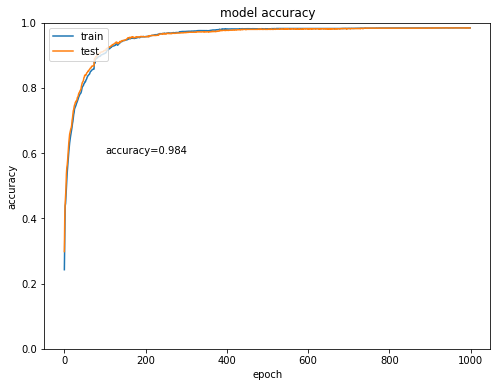

In [19]:
plt.figure(figsize=(8,6))
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim((0, 1)) # Uncomment this when showing you model for pay raise
plt.text(100,0.6,"accuracy="+str(round(preds[1],3)))
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#plt.savefig("accuary.png")

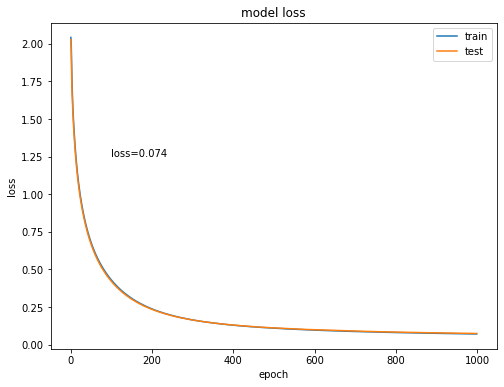

In [20]:
plt.figure(figsize=(8,6))
plt.plot(history.history["loss"])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.text(100,1.25,"loss="+str(round(preds[0],3)))
plt.legend(['train', 'test'], loc='best')
plt.show()
#plt.savefig("loss.png")

## Check the weight and bias

In [21]:
picmodel = load_model("./english_model_20200729.h5")

In [22]:
kernel_weights=np.squeeze(picmodel.get_weights())
#print(kernel_weights.flatten())
a1=np.squeeze(kernel_weights)[0:3,0:6].flatten()
print(kernel_weights)
N=abs(a1.flatten())[np.argmax(abs(a1.flatten()))]
print(N)
a1_nor=a1.flatten()/N
print(a1_nor)

[[ 1.0373114   7.549035    1.4696196  -1.5160872   0.15948755  1.5815539 ]
 [-6.677024   -2.5409868  -1.0440102   1.9445404   1.9279445  -0.8973275 ]
 [-8.051447    0.5946708   3.2355623   3.1867304   0.35500947 -1.5447552 ]]
8.051447
[ 0.12883541  0.9375998   0.18252863 -0.18829997  0.01980856  0.19643103
 -0.8292949  -0.3155938  -0.1296674   0.2415144   0.23945318 -0.11144922
 -1.          0.07385887  0.40186098  0.395796    0.04409263 -0.19186057]


In [23]:
picmodel.summary()

Model: "JSmodel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10, 10, 1)]       0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 12, 12, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 4, 2, 1)           18        
_________________________________________________________________
activation_1 (Activation)    (None, 4, 2, 1)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8)                 0         
_________________________________________________________________
activation_2 (Activation)    (None, 8)                 0         
Total params: 18
Trainable params: 18
Non-trainable params: 0
_______________________________________________________________

# the layer output, you need run the part with raw_datasets

In [24]:
# output every laryer result
def get_layer_output(model,x,index=0):
    layer = K.function([model.input],[model.layers[index].output])
    return layer([x])[0]

In [25]:
#check ouput for "A"

path="./twolayerdata_english/A/"
imlist=os.listdir(path)
print(len(imlist))
#rlist=random.sample(imlist,1000)
one_t=[]
One_t=[]
fn_t=[]
for elef in imlist:
    input_y=np.load("./twolayerdata_english/A/"+elef)
    input_y=input_y[0][1:11,1:11]
    input_x = np.expand_dims(input_y,axis=0)
    input_x = np.expand_dims(input_x,axis=3)
    layer_1 = get_layer_output(picmodel,input_x,index=1)
    layer_2 = get_layer_output(picmodel,input_x,index=2)
    layer_3 = get_layer_output(picmodel,input_x,index=3)
    layer_4 = get_layer_output(picmodel,input_x,index=4)
    layer_5 = get_layer_output(picmodel,input_x,index=5)
    one_t.append(class_names[np.argmax(layer_5)])
    if class_names[np.argmax(layer_5)]=="A":
        FN_t=[]
        FN_t.append(elef)
        FN_t.append(layer_2.flatten())
        fn_t.append(FN_t)
        #print(elef,layer_2.flatten(),class_names[np.argmax(layer_5)])
        One_t.append(elef) 
one1=collections.Counter(one_t)
print(len(one_t),collections.Counter(one_t))

1000
1000 Counter({'A': 993, 'F': 4, 'D': 2, 'E': 1})


In [26]:
path="./twolayerdata_english/B/"
imlist=os.listdir(path)
#rlist=random.sample(imlist,1000)
two_t=[]
Two_t=[]
B_t=[]
for elef in imlist:
    input_y=np.load("./twolayerdata_english/B/"+elef)
    input_y=input_y[0][1:11,1:11]
    input_x = np.expand_dims(input_y,axis=0)
    input_x = np.expand_dims(input_x,axis=3)
    layer_1 = get_layer_output(picmodel,input_x,index=1)
    layer_2 = get_layer_output(picmodel,input_x,index=2)
    layer_3 = get_layer_output(picmodel,input_x,index=3)
    layer_4 = get_layer_output(picmodel,input_x,index=4)
    layer_5 = get_layer_output(picmodel,input_x,index=5)
    two_t.append(class_names[np.argmax(layer_5)])
    if class_names[np.argmax(layer_4)]=="B":
        FN_t=[]
        FN_t.append(elef)
        FN_t.append(layer_2.flatten())
        B_t.append(FN_t)
        #print(elef,layer_2.flatten(),class_names[np.argmax(layer_5)]) 
        Two_t.append(elef)
two1=collections.Counter(two_t)
print(len(two_t),collections.Counter(two_t))

1000 Counter({'B': 974, 'E': 18, 'C': 8})


In [27]:
path="./twolayerdata_english/C/"
imlist=os.listdir(path)
#rmlist=random.sample(imlist,1000)
three_t=[]
Three_t=[]
C_t=[]
for elef in imlist:
    input_y=np.load("./twolayerdata_english/C/"+elef)
    input_y=input_y[0][1:11,1:11]
    input_x = np.expand_dims(input_y,axis=0)
    input_x = np.expand_dims(input_x,axis=3)
    layer_1 = get_layer_output(picmodel,input_x,index=1)
    layer_2 = get_layer_output(picmodel,input_x,index=2)
    layer_3 = get_layer_output(picmodel,input_x,index=3)
    layer_4 = get_layer_output(picmodel,input_x,index=4)
    layer_5 = get_layer_output(picmodel,input_x,index=5)
    three_t.append(class_names[np.argmax(layer_5)])
    if class_names[np.argmax(layer_4)]=="C":
        FN_t=[]
        FN_t.append(elef)
        FN_t.append(layer_2.flatten())
        C_t.append(FN_t)
        #print(elef,layer_2.flatten(),class_names[np.argmax(layer_5)])
        Three_t.append(elef)
three1=collections.Counter(three_t)
print(len(three_t),collections.Counter(three_t))

1000 Counter({'C': 898, 'H': 60, 'D': 34, 'E': 8})


In [28]:
path="./twolayerdata_english/D/"
imlist=os.listdir(path)
#rmlist=random.sample(imlist,1000)
four_t=[]
Four_t=[]
D_t=[]
for elef in imlist:
    input_y=np.load("./twolayerdata_english/D/"+elef)
    input_y=input_y[0][1:11,1:11]
    input_x = np.expand_dims(input_y,axis=0)
    input_x = np.expand_dims(input_x,axis=3)
    layer_1 = get_layer_output(picmodel,input_x,index=1)
    layer_2 = get_layer_output(picmodel,input_x,index=2)
    layer_3 = get_layer_output(picmodel,input_x,index=3)
    layer_4 = get_layer_output(picmodel,input_x,index=4)
    layer_5 = get_layer_output(picmodel,input_x,index=5)
    four_t.append(class_names[np.argmax(layer_5)])
    if class_names[np.argmax(layer_2)]=="D":
        FN_t=[]
        FN_t.append(elef)
        FN_t.append(layer_2.flatten())
        D_t.append(FN_t)
        #print(elef,layer_2.flatten(),class_names[np.argmax(layer_4)])
        Four_t.append(elef)
four1=collections.Counter(four_t)
print(len(four_t),collections.Counter(four_t))

1000 Counter({'D': 996, 'E': 2, 'H': 1, 'C': 1})


In [29]:
path="./twolayerdata_english/E/"
imlist=os.listdir(path)
#rmlist=random.sample(imlist,1000)
five_t=[]
Five_t=[]
E_t=[]
#print(len(imlist))
for elef in imlist:
    input_y=np.load("./twolayerdata_english/E/"+elef)
    input_y=input_y[0][1:11,1:11]
    input_x = np.expand_dims(input_y,axis=0)
    input_x = np.expand_dims(input_x,axis=3)
    layer_1 = get_layer_output(picmodel,input_x,index=1)
    layer_2 = get_layer_output(picmodel,input_x,index=2)
    layer_3 = get_layer_output(picmodel,input_x,index=3)
    layer_4 = get_layer_output(picmodel,input_x,index=4)
    layer_5 = get_layer_output(picmodel,input_x,index=5)
    five_t.append(class_names[np.argmax(layer_5)])
    if class_names[np.argmax(layer_4)]=="E":
        FN_t=[]
        FN_t.append(elef)
        FN_t.append(layer_2.flatten())
        E_t.append(FN_t)
        #print(elef,layer_2.flatten(),class_names[np.argmax(layer_4)])
        Five_t.append(elef)
five1=collections.Counter(five_t)
print(len(five_t),collections.Counter(five_t))

1000 Counter({'E': 989, 'H': 6, 'F': 2, 'A': 1, 'C': 1, 'D': 1})


In [30]:
path="./twolayerdata_english/F/"
imlist=os.listdir(path)
#rmlist=random.sample(imlist,1000)
six_t=[]
Six_t=[]
F_t=[]
for elef in imlist:
    input_y=np.load("./twolayerdata_english/F/"+elef)
    input_y=input_y[0][1:11,1:11]
    input_x = np.expand_dims(input_y,axis=0)
    input_x = np.expand_dims(input_x,axis=3)
    layer_1 = get_layer_output(picmodel,input_x,index=1)
    layer_2 = get_layer_output(picmodel,input_x,index=2)
    layer_3 = get_layer_output(picmodel,input_x,index=3)
    layer_4 = get_layer_output(picmodel,input_x,index=4)
    layer_5 = get_layer_output(picmodel,input_x,index=5)
    six_t.append(class_names[np.argmax(layer_5)])
    if class_names[np.argmax(layer_5)]=="F":
        FN_t=[]
        FN_t.append(elef)
        FN_t.append(layer_2.flatten())
        F_t.append(FN_t)
        #print(elef,layer_2.flatten(),class_names[np.argmax(layer_5)])
        Six_t.append(elef)
six1=collections.Counter(six_t)
print(len(six_t),collections.Counter(six_t))

1000 Counter({'F': 980, 'D': 20})


In [31]:
path="./twolayerdata_english/G/"
imlist=os.listdir(path)
#rmlist=random.sample(imlist,1000)
seven_t=[]
Seven_t=[]
G_t=[]
for elef in imlist:
    input_y=np.load("./twolayerdata_english/G/"+elef)
    input_y=input_y[0][1:11,1:11]
    input_x = np.expand_dims(input_y,axis=0)
    input_x = np.expand_dims(input_x,axis=3)
    layer_1 = get_layer_output(picmodel,input_x,index=1)
    layer_2 = get_layer_output(picmodel,input_x,index=2)
    layer_3 = get_layer_output(picmodel,input_x,index=3)
    layer_4 = get_layer_output(picmodel,input_x,index=4)
    layer_5 = get_layer_output(picmodel,input_x,index=5)
    seven_t.append(class_names[np.argmax(layer_5)])
    if class_names[np.argmax(layer_5)]=="G":
        FN_t=[]
        FN_t.append(elef)
        FN_t.append(layer_2.flatten())
        G_t.append(FN_t)
        #print(elef,layer_2.flatten(),class_names[np.argmax(layer_5)])
        Seven_t.append(elef)
seven1=collections.Counter(seven_t)
print(len(seven_t),collections.Counter(seven_t))

1000 Counter({'G': 917, 'C': 57, 'E': 24, 'H': 2})


In [32]:
path="./twolayerdata_english/H/"
imlist=os.listdir(path)
#rmlist=random.sample(imlist,1000)
eight_t=[]
Eight_t=[]
H_t=[]
for elef in imlist:
    input_y=np.load("./twolayerdata_english/H/"+elef)
    input_y=input_y[0][1:11,1:11]
    input_x = np.expand_dims(input_y,axis=0)
    input_x = np.expand_dims(input_x,axis=3)
    layer_1 = get_layer_output(picmodel,input_x,index=1)
    layer_2 = get_layer_output(picmodel,input_x,index=2)
    layer_3 = get_layer_output(picmodel,input_x,index=3)
    layer_4 = get_layer_output(picmodel,input_x,index=4)
    layer_5 = get_layer_output(picmodel,input_x,index=5)
    eight_t.append(class_names[np.argmax(layer_5)])
    if class_names[np.argmax(layer_5)]=="H":
        FN_t=[]
        FN_t.append(elef)
        FN_t.append(layer_2.flatten())
        H_t.append(FN_t)
        #print(elef,layer_2.flatten(),class_names[np.argmax(layer_5)])
        Eight_t.append(elef)
eight1=collections.Counter(eight_t)
print(len(eight_t),collections.Counter(eight_t))

1000 Counter({'H': 995, 'D': 5})


# output the model accuracy on every character 

C:\Users\dirac\miniconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\dirac\miniconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\dirac\miniconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\dirac\minicon

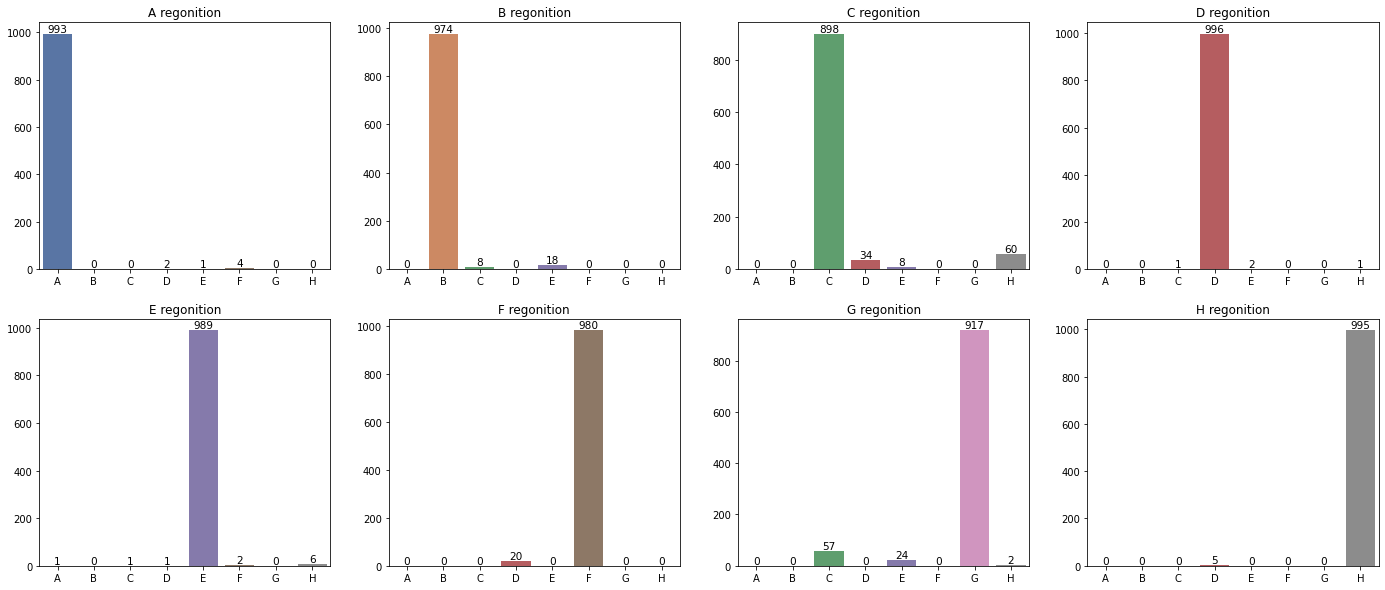

In [33]:
import pandas as pd
import seaborn as sns
current_palette = sns.color_palette()
#dict1 = pd.DataFrame(pd.Series(f1),columns=["numbers"],index=["fire","soil","water","wood","gas","sky","human","life"])
x=["A","B","C","D","E","F","G","H"]
dict1=pd.Series(one1).reindex(["A","B","C","D","E","F","G","H"])
dict1=dict1.fillna(0)
dict2=pd.Series(two1).reindex(["A","B","C","D","E","F","G","H"])
dict2=dict2.fillna(0)
dict3=pd.Series(three1).reindex(["A","B","C","D","E","F","G","H"])
dict3=dict3.fillna(0)
dict4=pd.Series(four1).reindex(["A","B","C","D","E","F","G","H"])
dict4=dict4.fillna(0)
#dict4[np.squeeze(np.argwhere(np.isnan(dict4)))]=0
dict5=pd.Series(five1).reindex(["A","B","C","D","E","F","G","H"])
dict5=dict5.fillna(0)
#dict5[np.squeeze(np.argwhere(np.isnan(dict5)))]=0
dict6=pd.Series(six1).reindex(["A","B","C","D","E","F","G","H"])
dict6=dict6.fillna(0)
#dict6[np.squeeze(np.argwhere(np.isnan(dict6)))]=0
dict7=pd.Series(seven1).reindex(["A","B","C","D","E","F","G","H"])
dict7=dict7.fillna(0)
#dict7[np.squeeze(np.argwhere(np.isnan(dict7)))]=0
dict8=pd.Series(eight1).reindex(["A","B","C","D","E","F","G","H"])
dict8=dict8.fillna(0)
#dict8[np.squeeze(np.argwhere(np.isnan(dict8)))]=0
plt.figure(figsize=(24,10))
plt.subplot(241)
#plt.bar(x,dict1,color="red")
sns.barplot(x,dict1,palette="deep")
plt.title("A regonition")
for i,j in zip(range(8), dict1):
        plt.text(i, j, str(int(j)), ha='center', va='bottom', fontsize=10.5)
#print(dict1)
plt.subplot(242)
sns.barplot(x,dict2,palette="deep")
plt.title("B regonition")
for i,j in zip(range(8), dict2):
        plt.text(i, j, str(int(j)), ha='center', va='bottom', fontsize=10.5)
#print(dict2)
plt.subplot(243)
sns.barplot(x,dict3,palette="deep")
plt.title("C regonition")
for i,j in zip(range(8), dict3):
        plt.text(i, j, str(int(j)), ha='center', va='bottom', fontsize=10.5)
#print(dict1)
plt.subplot(244)
sns.barplot(x,dict4,palette="deep")
plt.title("D regonition")
for i,j in zip(range(8), dict4):
        plt.text(i, j, str(int(j)), ha='center', va='bottom', fontsize=10.5)
#print(dict1)
plt.subplot(245)
sns.barplot(x,dict5,palette="deep")
plt.title("E regonition")
for i,j in zip(range(8), dict5):
        plt.text(i, j, str(int(j)), ha='center', va='bottom', fontsize=10.5)
#print(dict1)
plt.subplot(246)
sns.barplot(x,dict6,palette="deep")
plt.title("F regonition")
for i,j in zip(range(8), dict6):
        plt.text(i, j, str(int(j)), ha='center', va='bottom', fontsize=10.5)
#print(dict1)
plt.subplot(247)
sns.barplot(x,dict7,palette="deep")
plt.title("G regonition")
for i,j in zip(range(8), dict7):
        plt.text(i, j, str(int(j)), ha='center', va='bottom', fontsize=10.5)
#print(dict1)
plt.subplot(248)
sns.barplot(x,dict8,palette="deep")
plt.title("H regonition")
for i,j in zip(range(8), dict8):
        plt.text(i, j, str(int(j)), ha='center', va='bottom', fontsize=10.5)
#print(dict1)
#list1=dict1.values.tolist()
#plt.savefig("regonition.png")
plt.show()